### Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

### 1) Build a deep learning model to predict churn rate at bank. 

### 2) Once model is built, print classification report and analyze precision, recall and f1-score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read csv file
df = pd.read_csv("Bank_Customer_Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
# looks like customerID, Surname, Geography  nad Rownumber may not be much useful in DL , can be dropped from dataframe
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis = 'columns')
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# look likE dataset is clean.
# check for any NaN or missing data
df.isnull()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [7]:
# looks like no missing data in columns, pretty clean?

In [8]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Visualisation 

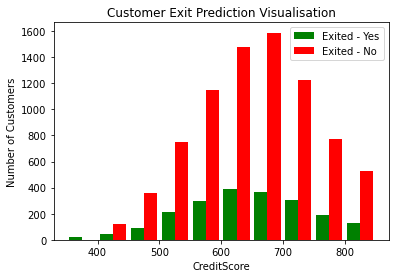

In [9]:
# Considered credit score , tenure and estmiated salary play significant role whether customer leave or stay with bank
CreditScore_Exited_Yes = df[df.Exited ==1].CreditScore
CreditScore_Exited_No = df[df.Exited ==0].CreditScore

# plot histogram plot
plt.ylabel('Number of Customers')
plt.xlabel('CreditScore')
plt.title('Customer Exit Prediction Visualisation')

plt.hist([CreditScore_Exited_Yes, CreditScore_Exited_No], rwidth = 0.85, color = ['green', 'red'], label = ['Exited - Yes', 'Exited - No'] )
plt.legend()

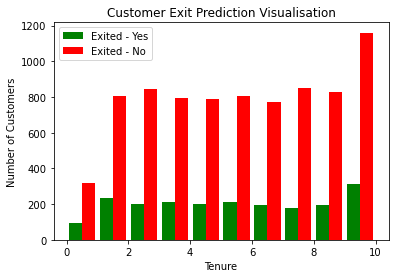

In [10]:
# Considered credit score , tenure and estmiated salary play significant role whether customer leave or stay with bank
Tenure_Exited_Yes = df[df.Exited ==1].Tenure
Tenure_Exited_No = df[df.Exited ==0].Tenure

# plot histogram plot
plt.ylabel('Number of Customers')
plt.xlabel('Tenure')
plt.title('Customer Exit Prediction Visualisation')

plt.hist([Tenure_Exited_Yes, Tenure_Exited_No], rwidth = 0.85, color = ['green', 'red'], label = ['Exited - Yes', 'Exited - No'] )
plt.legend()


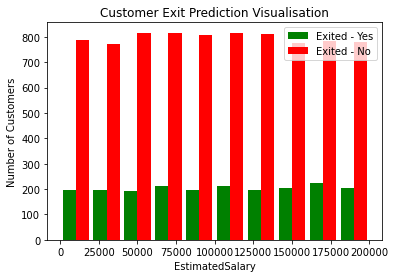

In [11]:
# Considered credit score , tenure and estmiated salary play significant role whether customer leave or stay with bank
EstimatedSalary_Exited_Yes = df[df.Exited ==1].EstimatedSalary
EstimatedSalary_Exited_No = df[df.Exited ==0].EstimatedSalary

# plot histogram plot
plt.ylabel('Number of Customers')
plt.xlabel('EstimatedSalary')
plt.title('Customer Exit Prediction Visualisation')

plt.hist([EstimatedSalary_Exited_Yes, EstimatedSalary_Exited_No], rwidth = 0.85, color = ['green', 'red'], label = ['Exited - Yes', 'Exited - No'] )
plt.legend()


In [12]:
df.shape

(10000, 10)

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# except Gender column , all columns are numerical. Change gender values to female = 0 and male = 1
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace = True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# scale the columns between 0 to 1 using MinMaxScaler

col_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [16]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


## Build ANN model 

In [17]:
# create indenpent (X) and dependent (y) dataset
X = df.drop('Exited', axis = 'columns')
y = df.Exited

In [18]:
# Train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [19]:
X_train.shape

(8000, 9)

In [20]:
X_test.shape

(2000, 9)

In [21]:
y_train.shape

(8000,)

In [22]:
y_test.shape

(2000,)

In [23]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(9, input_shape = (9,), activation = 'relu', kernel_initializer = 'ones', bias_initializer = 'zeros'), 
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# keras optimizer - adam and learing rate = 0.01

model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy', 
             metrics= ['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 527us/step - loss: 0.5115 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 534us/step - loss: 0.4940 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 509us/step - loss: 0.4730 - accuracy: 0.7962
Epoch 4/100
250/250 [==============================] - 0s 512us/step - loss: 0.4598 - accuracy: 0.8019
Epoch 5/100
250/250 [==============================] - 0s 500us/step - loss: 0.4527 - accuracy: 0.8058
Epoch 6/100
250/250 [==============================] - 0s 510us/step - loss: 0.4472 - accuracy: 0.8071
Epoch 7/100
250/250 [==============================] - 0s 510us/step - loss: 0.4444 - accuracy: 0.8084
Epoch 8/100
250/250 [==============================] - 0s 500us/step - loss: 0.4422 - accuracy: 0.8081
Epoch 9/100
250/250 [==============================] - 0s 507us/step - loss: 0.4423 - accuracy: 0.8066
Epoch 10/100
250/250 [==============================] - 0s 499us/step - l

250/250 [==============================] - 0s 521us/step - loss: 0.4126 - accuracy: 0.8329
Epoch 80/100
250/250 [==============================] - 0s 544us/step - loss: 0.4135 - accuracy: 0.8339
Epoch 81/100
250/250 [==============================] - 0s 548us/step - loss: 0.4137 - accuracy: 0.8324
Epoch 82/100
250/250 [==============================] - 0s 540us/step - loss: 0.4120 - accuracy: 0.8331
Epoch 83/100
250/250 [==============================] - 0s 512us/step - loss: 0.4120 - accuracy: 0.8328
Epoch 84/100
250/250 [==============================] - 0s 516us/step - loss: 0.4133 - accuracy: 0.8320
Epoch 85/100
250/250 [==============================] - 0s 544us/step - loss: 0.4122 - accuracy: 0.8329
Epoch 86/100
250/250 [==============================] - 0s 548us/step - loss: 0.4129 - accuracy: 0.8336
Epoch 87/100
250/250 [==============================] - 0s 539us/step - loss: 0.4123 - accuracy: 0.8324
Epoch 88/100
250/250 [==============================] - 0s 572us/step - loss:

In [24]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 418us/step - loss: 0.4097 - accuracy: 0.8280


[0.4096708595752716, 0.828000009059906]

In [25]:
y_predicted = model.predict(X_test)

In [26]:
y_predicted[:10]

array([[0.10918662],
       [0.10105738],
       [0.10171372],
       [0.05479279],
       [0.16917932],
       [0.29355127],
       [0.0364821 ],
       [0.16165876],
       [0.06465596],
       [0.22631893]], dtype=float32)

In [27]:
# convert predicted values to 0 and 1 based on y_predicted value less than 0.5 and more than 0.5 respectively
y_p = []

for element in y_predicted:
    if element < 0.5:
        y_p.append(0)
    else: 
        y_p.append(1)
        
y_p[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [28]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [29]:
# define confusion matrix and classfication report
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1595
           1       0.70      0.26      0.38       405

    accuracy                           0.83      2000
   macro avg       0.77      0.62      0.64      2000
weighted avg       0.81      0.83      0.79      2000



Text(69.0, 0.5, 'Truth')

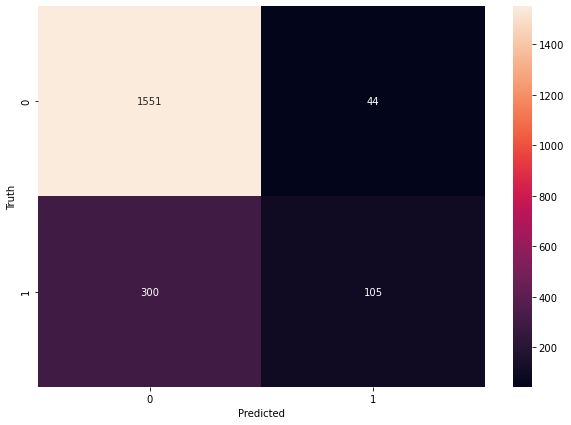

In [30]:
# plot confusion matrix

import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_p)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
# Accuracy of confusion matrix comparison
round((1551+105)/(1551+44+300+105), 2)

0.83

In [32]:
# Matches with model prediction 

In [46]:
# Precision with zero exit
# round(1551/(1551+300), 2)

p0 = 1551/(1551+300)

In [47]:
# Precision with 1 exit
p1 = 105/(105+44)

In [48]:
# Recall for zero class 
r0 = 1551/(1551+44)

In [49]:
# Recall for 1 class 
r1 = 300/(300+105)

In [50]:
p = (p1+p0)/2
r = (r1+r0)/2

In [51]:
# f1 score = 2*((precision * recall)/(precision+recall))
f1 = 2*(p*r)/(p+r)
f1

0.811711472503389